# Bonusleistung Paket 4 Teil 2
### Aus der Schulung Ausreißererkennung

Nach vielem Hin und Her habe ich mich für ein Dataset entschieden, das knapp 2000 Schokoladensorten mit ihrem Kakaosorten umfasst. Dieses beinhaltet zusätzlich ein Rating der Sorten.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Datensatz flavors_of_cacao.csv einlesen und fehlende Werte(im Dataset leer) als Null-Wert setzen

In [48]:
df = pd.read_csv("flavors_of_cacao.csv",na_values='\xa0')
df

,Company(Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,NaN,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,NaN,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,NaN,India


In [54]:
df.isnull().sum()

Company(Maker-if known)               0
Specific Bean Origin or Bar Name      0
REF                                   0
Review Date                           0
Cocoa Percent                         0
Company Location                      0
Rating                                0
Bean Type                           888
Broad Bean Origin                    74
dtype: int64

Der eingelesene Datensatz benötigt noch einige Anpassungen:
 - Der Kakaoanteil wird als String mit Prozentzeichen angegeben -> Umwandlung in Dezimalzahl
 - Die Spalte "Bean Type" hat sehr viele fehlende Werte (50%+) und wird daher entfernt
 - Die Spalte "Specific Bean Origin or Bar Name" ist aufgrund fast ausschließlich unterschiedlicher Werte nicht wirklich aussagekräftig und wird entfernt
 - ~~74 Datensätze haben Null-Werte bei "Broad Bean Origin" und werden entfernt~~ (Wieder verworfen)
 - ~~Die kategorischen Spalten Company(Maker-if known), Company Location und Broad Bean Origin habe ich in numerische Spalten umgewandelt~~ (Wieder verworfen)
 - Auf die Spalte "Review Date" habe ich das One Hot Encoding angewendet

##### Spalte "Cocoa Percent" in Dezimal umwandeln

In [151]:
dfPrepared = df.copy()
dfPrepared['Cocoa Percent'] = dfPrepared['Cocoa Percent'].apply(lambda x: x.split('%')[0])
dfPrepared['Cocoa Percent'] = dfPrepared['Cocoa Percent'].astype(float) / 100

##### Spalten 'Bean Type' und 'Specific Bean Origin or Bar Name' entfernen

In [152]:
dfPrepared.drop(columns=['Bean Type', 'Specific Bean Origin or Bar Name'], inplace=True)

In [129]:
# Datensätze mit Null entfernen (74 Stück)
#dfPrepared.dropna(subset = ["Broad Bean Origin"], inplace=True)
#dfPrepared

In [122]:
# Kategorische in numerische Spalten umwandeln
#from sklearn import preprocessing
#df_neu = dfPrepared.copy()
#label_encoder = preprocessing.LabelEncoder()
#df_neu['Company(Maker-if known)'] = label_encoder.fit_transform(df_neu['Company(Maker-if known)'])
#df_neu['Company Location'] = label_encoder.fit_transform(df_neu['Company Location'])
#df_neu['Broad Bean Origin'] = label_encoder.fit_transform(df_neu['Broad Bean Origin'])

#df_neu['Broad Bean Origin'].unique()
#df_neu

Ich habe mich letztendlich dazu entschieden nur die Spalten 'Cocoa Percent', 'Rating' und 'Review Date' zu nehmen

In [132]:
df_neu = dfPrepared[['Cocoa Percent', 'Rating', 'Review Date']]

### One Hot Encoding für Spalte "Review Date"

In [133]:
df_neu = pd.get_dummies(df_neu, prefix='',prefix_sep='',columns=['Review Date'])
df_neu.head()

,Cocoa Percent,Rating,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0.63,3.75,0,0,0,0,0,0,0,0,0,0,1,0
1,0.70,2.75,0,0,0,0,0,0,0,0,0,1,0,0
2,0.70,3.00,0,0,0,0,0,0,0,0,0,1,0,0
3,0.70,3.50,0,0,0,0,0,0,0,0,0,1,0,0
4,0.70,3.50,0,0,0,0,0,0,0,0,0,1,0,0


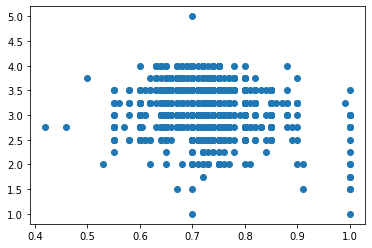

In [154]:
plt.scatter(df_neu['Cocoa Percent'], df_neu['Rating'])

In [134]:
len(df['Rating'].unique())

13

### Normalisierung mit StandardScaler
Da ich mit diesem Dataset zu keinen brauchbaren Ergebnissen mitr dem MinMaxScaler gekommen bin habe ich hier wieder den StandardScaler genommen

In [156]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#scaler = MinMaxScaler()
scaler = StandardScaler()
df_num = StandardScaler().fit_transform(df_neu)
df_scaled = pd.DataFrame(df_num, columns = df_neu.columns, index = df_neu.index)
df_scaled.head()

#scaler = MinMaxScaler()
#d_scaled = scaler.fit_transform(df_neu)
#df_scaled = pd.DataFrame(d_scaled)
#df_scaled.head()

,Cocoa Percent,Rating,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,-1.424219,1.202218,-0.185081,-0.204371,-0.234906,-0.265092,-0.260034,-0.316834,-0.350193,-0.34283,-0.399629,-0.441745,2.646630,-0.118923
1,-0.280496,-0.968270,-0.185081,-0.204371,-0.234906,-0.265092,-0.260034,-0.316834,-0.350193,-0.34283,-0.399629,2.263748,-0.377839,-0.118923
2,-0.280496,-0.425648,-0.185081,-0.204371,-0.234906,-0.265092,-0.260034,-0.316834,-0.350193,-0.34283,-0.399629,2.263748,-0.377839,-0.118923
3,-0.280496,0.659596,-0.185081,-0.204371,-0.234906,-0.265092,-0.260034,-0.316834,-0.350193,-0.34283,-0.399629,2.263748,-0.377839,-0.118923
4,-0.280496,0.659596,-0.185081,-0.204371,-0.234906,-0.265092,-0.260034,-0.316834,-0.350193,-0.34283,-0.399629,2.263748,-0.377839,-0.118923


### Geeignete Parameter für DBSCAN finden
Um geeignete Parameter für den zu finden habe ich diese Umsetzung gefunden (Die stammt nicht von mir, ich habe lediglich die Parameter in np.linspace(...) angepasst) und genutzt

In [136]:
A = []
B = []
C = []

for i in np.linspace(0.1,5,50):
    db = DBSCAN(eps=i, min_samples=10).fit(df_scaled)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    sum = 0
    for t in labels:
        if t == -1: 
            sum = sum + 1
    C.append(sum)
            
    
    
    A.append(i)
    B.append(int(n_clusters_))

In [137]:
test = pd.DataFrame()
test['eps'] = A
test['Anzahl Cluster'] = B
test['Ausreißer'] = C
test

,eps,Anzahl Cluster,Ausreißer
0,0.1,28,1253
1,0.2,35,1109
2,0.3,36,1098
3,0.4,40,791
4,0.5,44,598
5,0.6,17,294
6,0.7,15,201
7,0.8,13,170
8,0.9,12,114
9,1.0,12,77


### Clustering durchführen

In [163]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1, min_samples=10).fit(df_num)

anzahl_cluster = len(set(labels)) - (1 if -1 in labels else 0)
print("Anzahl Cluster ohne Ausreißer:", anzahl_cluster)

Anzahl Cluster ohne Ausreißer: 12


In [139]:
pd.DataFrame(clustering.labels_).describe()

,0
count,1721.000000
mean,3.502034
std,3.140160
min,-1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,11.000000


In [161]:
df_final = pd.DataFrame(clustering.labels_)
df_final['Cluster'] = pd.DataFrame(clustering.labels_)
df_final['Cocoa Percent'] = df['Cocoa Percent']
df_final['Review Date'] = df['Review Date']
df_final['Rating'] = df['Rating']

df_final.head()

,0,Cluster,Cocoa Percent,Review Date,Rating
0,0,0,63%,2016.0,3.75
1,1,1,70%,2015.0,2.75
2,1,1,70%,2015.0,3.00
3,1,1,70%,2015.0,3.50
4,1,1,70%,2015.0,3.50


In [158]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = clustering.labels_

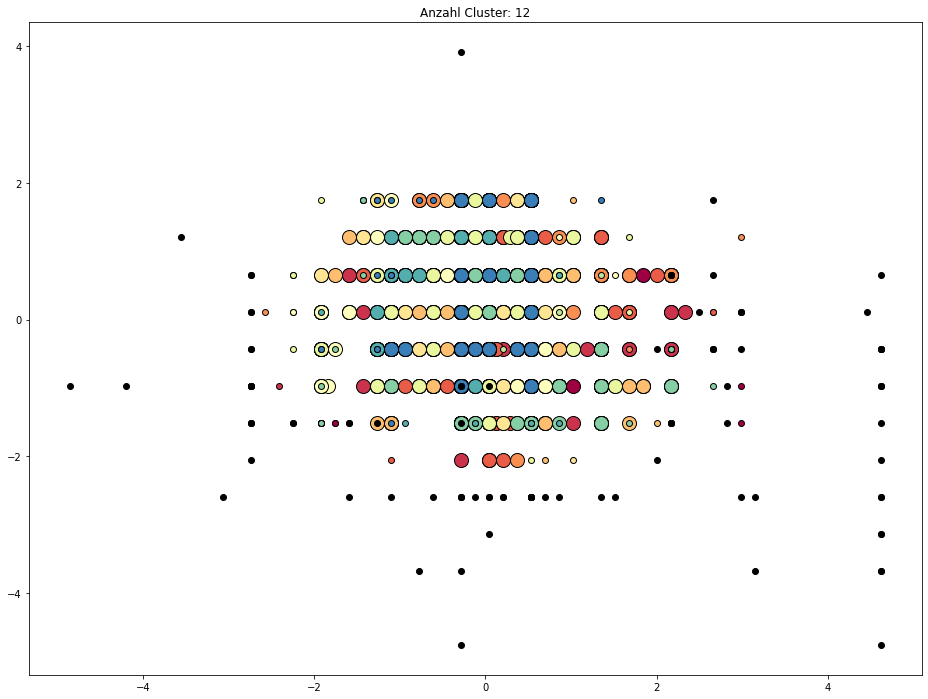

In [164]:
plt.figure(figsize=(16,12))
X = df_num

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Anzahl Cluster: %d' % anzahl_cluster)
plt.show()

## Fazit

Ursprünglich hatte ich angenommen, dass sich diese Schulung recht leicht mit einem anderen Dataset umsetzen lässt, aber ich hatte doch recht viele Probleme. Mit zwei Datasets kam ich zu keinem Ergebnis. Als drittes habe ich dann ein Dataset mit Kakaosorten versucht und dieses hat nach einigem hin und her zu einem Ergebnis geführt. Dafür musste ich aber noch einiges an Transformationen und Bereinigungen am Dataset vornehmen.    
Außerdem habe ich auf eine andere Möglichkeit der Visualisierung der Cluster und Ausreißer zurückgegriffen, da es mit insgesamt 13 Cluster recht aufwendig geworden wäre das ganze per Hand zu schreiben.    
    
Letzendlich kann man in dem Scatterplot aber nun sehr schön die Ausreißer erkennen(schwarze Punkte). Hier sieht man auch, dass die von mir durchgeführte Ausreißererkennung nicht ganz perfekt ist und noch optimiert werden könnte. Einige Ausreißer befinden sich in einem Bereich den man noch nicht als Ausreißer ansehen könnte, sowie andere Datenpunkte, die nicht als Ausreißer klassifiziert wurden und einem Cluster zugeordnet wurden, gehören eher zu den Ausreißern.    
    
Insgesamt ist dies aber das beste Ergebnis das ich erzielen konnte und größtenteils stimmt die Ausreißererkennung überein.